# <center>`Pandas Tutorial`</center>
<hr>

<div>

</div>

Pandas is a open source python library used for data analysis and manipulation.  
<br>
Features:
- Provides data-structures that can be used to store and manipulate data.
- Two data-structures are provided, namely, `Series` and `Dataframe`.  
<br>

[Homepage of Pandas](https://pandas.pydata.org/)


## `Prerequisites`
Since Pandas is a python library and is built on top of Numpy, you are required to know the basics of python and numpy before you proceed with this tutorial.

## `Installation`
>pip install:  
`pip install pandas`

>Anaconda install:  
`conda install -c anaconda pandas`

## `Initialize`

In [1]:
# Import pandas
import pandas as pd # Importing pandas with alias 'pd'
import numpy as np # numpy offers additional capabilities to pandas.

# Checking Pandas current version
print('Pandas Version: ', pd.__version__)

# Checking Numpy current version
print('Numpy Version: ', np.__version__)

Pandas Version:  2.0.1
Numpy Version:  1.24.3


# `Data Structures`

We'll study two datastructures namely, 'Series' and 'Datafarme'. Though Series is used quite less often compared to Dataframe, many of the row and column operations performed on Dataframes, return a series. This means, such row/column operations are performed at a series level. Hence it becomes necessary to learn series operations first, before moving on to learning operations on Dataframe.  We'll first learn some common operations that can be performed on a series then move on to learning operations on Dataframes.

## Series
A series is basically a 1D array whose values are lebeled for easy access. And all the values are of the same datatype. (see image below)  
Things to note about Series:
- The array in the series is of the type `numpy ndarray`.
- The labels together are called as 'Index'. The index is of the type `pandas.core.indexes.base.Index`
- Since all the values are of the same datatype, Series are called as being _homogeneous_.
<br>
<hr>
<h3>Structure of a Series</h3>
<div>

</div>
<br>
<hr>

In [2]:
# Check the datatype of array containg the values. Must be a numpy ndarray
type(pd.Series().values)

numpy.ndarray

In [3]:
# Check the datatype of Index
type(pd.Series().index)

pandas.core.indexes.range.RangeIndex

### Usage  
`pd.Series(data=None, index=None, dtype=None, name=None, copy=False)`  
* **Returns:**  
    `Series` object.  
<br>

* **Parameters:**
    - `data`: The input data. A scalar or an iterable, like a list, tupple, dict, 1D array that contains the values to be stored in the series.
    - `index`: An 1D iterable containg the labels for each value. If index is not specified, a range index will be used by the series.
    - `dtype`: (string, numpy.dtype) The datatype of the values. If not passed, the dtype of the values will be used, if the values have different dtypes, object dtype will be used.
    - `name`: (Optional string) Name to give to the series. If no name is passed, no name is assigned to the series.
    - `copy`: (Bool) If True is passed, A copy of input data is set as the series values, if False is passed a view of the input data is set as series values. Only affects Series or 1D ndarray input.

### Create a Series
#### Create a Series from a List

In [4]:
# Create a series with data passed as a list of values
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In the output above:
- the numbers from 0 to 3 on the left side are the index. Since no index is passed, pandas automatically used a range index (0 to 3).
- the numbers from 1 to 4 on the right side are the values.  

In [5]:
# Assign series to a variable
s = pd.Series([1,2,3,4])
print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [6]:
# You can use pass values of any datatype 
pd.Series([1,'a',True,4.99])

0       1
1       a
2    True
3    4.99
dtype: object

When values of different dtypes are passed to a series, the series stores these values as object dtype, but when these values are referenced individually from the series, they are referenced with their original dtype.

In [7]:
# Passing values with different dtypes to a series, and checking the dtypes of each of those values
# when they are referenced individually.

s = pd.Series(['a',1,0,True]) # Values passed with different dtypes.
print(s) # Should print dtype as 'object'
vals_types = '\n'.join(['Value: {}, dtype: {}'.
                        format(v, str(type(v)).split("'")[1]) for v in s.values]) # Values and their datatypes
print('\n',vals_types)

0       a
1       1
2       0
3    True
dtype: object

 Value: a, dtype: str
Value: 1, dtype: int
Value: 0, dtype: int
Value: True, dtype: bool


You can read more about this datatype ambiguity at https://stackoverflow.com/questions/70718929/pandas-is-series-homogenous

In [8]:
pd.Series(['male','male','female'])

0      male
1      male
2    female
dtype: object

str dtype passed to a series will be held as object dtype in the series.

In [9]:
# Creating Series from Numpy Array
pd.Series(np.array([1,2,3,4]))

0    1
1    2
2    3
3    4
dtype: int64

In [10]:
# Creating Series from another Series.
s = pd.Series(['a', 'b', 'c'])
pd.Series(s)

0    a
1    b
2    c
dtype: object

<div class="alert alert-block alert-warning">
⚠️<b> Warning</b>
<hr>
The <code>copy</code> parameter of the series is set to <code>False</code> by default. This means when the input data passed to a Series is an 1d ndarray object or another Series object, a view of that object is created. Thus modifying the series values will modify the data object that was passed aswell. So care must be taken while using a series or an ndarray as input data to another series. If you want to create a copy instead of a view, set the Series's <code>copy</code> parameter to <code>True</code>.
</div>

#### Create a Series by Passing an Index/Labels

In [11]:
# Pass index/labels
pd.Series([1,2,3,4], index=['a','b','c','d'])

a    1
b    2
c    3
d    4
dtype: int64

In [12]:
# Each Index label can be of any datatype
pd.Series([1,2,3,4], index=['a', 1, True, None])

a       1
1       2
True    3
None    4
dtype: int64

In [13]:
#Pandas suports duplicate labels
pd.Series([1,2,3], index=['a','b','b'])

a    1
b    2
b    3
dtype: int64

In [14]:
#Create series with scalar data
pd.Series(1)

0    1
dtype: int64

In [15]:
# Create series with a list containing one value. Same as creating a series with a scalar.
pd.Series([1])

0    1
dtype: int64

<div class="alert alert-block alert-info">
🗒<b> Note</b>
<hr>
As you may have noticed in the outputs of the above two cells, creating a series with a scalar and with a list containg single value has the same effect. 
</div>

In [16]:
# With the help of the passed index, you can set the same scalar value as all series values addressed by the index.
pd.Series(3.2, index=[1,2,3,4])

1    3.2
2    3.2
3    3.2
4    3.2
dtype: float64

In [17]:
# Another way without using an index.
pd.Series([3.2]*4)

0    3.2
1    3.2
2    3.2
3    3.2
dtype: float64

<div class="alert alert-block alert-info">
🗒<b> Note</b>
<hr>
Creating a list by repeating a [value] by a given number of times is a python trick and not a pandas trick.
    <br>
[val]*n = [val(0), val(1),...val(n-1)] 
</div>

In [18]:
# Passing datatype
pd.Series([-1,0,1,2], dtype=float)

0   -1.0
1    0.0
2    1.0
3    2.0
dtype: float64

In [19]:
pd.Series([-1,0,1,2], dtype='float32')

0   -1.0
1    0.0
2    1.0
3    2.0
dtype: float32

In [20]:
# Create a Series from a dict.
pd.Series({'a':1, 'b':2, 'c':3, 'd':4})
# If dict is passed as data to the series, dict keys become index and, dict values become series values.

a    1
b    2
c    3
d    4
dtype: int64

### Manipulate the Index

In [21]:
# Get the index of a series
s = pd.Series([1,2,3,4], index=['a','b','c','d'])
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [22]:
# Modify the index that was previously assigned
s = pd.Series([1,2,3,4], index=[1,2,3,4])

print(f'Original Series:\n{s}')
s.index = ['a','b','c','d']
print(f'\nSame series with modified index:\n{s}')

Original Series:
1    1
2    2
3    3
4    4
dtype: int64

Same series with modified index:
a    1
b    2
c    3
d    4
dtype: int64


The index object has several useful methods and attributes similar to a python list, like converting the index to a list, fetching index elements using python list indexing, slicing etc.

In [23]:
# Get series index as a list
s.index.to_list()

['a', 'b', 'c', 'd']

In [24]:
# Get series index as numpy array. Doesn't require numpy import.
np.array(s.index)

array(['a', 'b', 'c', 'd'], dtype=object)

In [25]:
# Get the dtype of the index
s.index[:2].tolist()

['a', 'b']

In [26]:
# Check if a certain index label exists in series
'a' in s

True

### Manipulate the Values

In [27]:
# Get the values of a series
s = pd.Series([1,2,3,4], index=['a','b','c','d'])
s.values

array([1, 2, 3, 4])

In [28]:
# Convert the value array to a list using the numpy built-in method 'ndarray.to_list()'
s.values.tolist()
# Remember, the list of values of a series is a numpy.ndarray?

[1, 2, 3, 4]

In [29]:
# Get the count of values in the series.
# Count is the number of values in the series.
s.count()

4

4 was returned, since there are 4 values in the series.

In [30]:
# Get the datatype of the series
s = pd.Series([1,2,3])
s.dtype

dtype('int64')

In [31]:
# Convert datatype
s = pd.Series([1,2,3,4]) #Original series
display(s)
s = s.astype('float') # Series with converted dtype. 
display(s)

0    1
1    2
2    3
3    4
dtype: int64

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [32]:
# Index based sorting:
# Explictly passing index along with data that is a dict, will result in values being sorted according to 
# the passed index.
pd.Series({'a':1, 'b':2, 'c':3, 'd':4}, index=['b','c','d','a'])

b    2
c    3
d    4
a    1
dtype: int64

In [33]:
# Passing an index value that is not matching any dict key will result in addition of a NaN value
# at the index value location
pd.Series({'a':1, 'b':2, 'c':3, 'd':4}, index=['b','c','d','z'])

b    2.0
c    3.0
d    4.0
z    NaN
dtype: float64

<div class="alert alert-block alert-info">
🗒<b> Note</b>
    <hr>
NaN (abrivation for <i>Not A Number</i>) is the standard missing data marker used in pandas.
</div>

In [34]:
# Fetching series values with index location
s = pd.Series([1,2,3,4], index=['a','b','c',True])
s[0]

1

In [35]:
# You can also pass the index value to the iloc function of the series.
s.iloc[0]

1

In [36]:
# Fetching series elements with index label, like how you do in fetching a dict value from its key.
s['a']

1

In [37]:
s[[0,2,3]]
# While fetching values from a list of individual index labels, the labels must be passed as a list.

a       1
c       3
True    4
dtype: int64

In [38]:
# Slicing series
# Slicing series is similar to slicing numpy ndarray.

s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e']) # Define Series for slicing
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [39]:
s[1:3] # Slicing to get values in range [1,3) (1 inclided, 3 not included)

b    2
c    3
dtype: int64

In [40]:
s[:3] # Slicing to get values in range [0,3)

a    1
b    2
c    3
dtype: int64

In [41]:
s['a':'c']

a    1
b    2
c    3
dtype: int64

In [42]:
s['c':'a']

Series([], dtype: int64)

In [43]:
s[['a','b','c']]

a    1
b    2
c    3
dtype: int64

### Perform Mathematical Operations on Series

In [44]:
# Like on numpy array, vectorized (element-wise) operations can be performed on series
s + 2

a    3
b    4
c    5
d    6
e    7
dtype: int64

In [45]:
# Vectorization enables some quick opereations on the elemtents

# Example 1: Quickly convert all elements to 0s
s - s

a    0
b    0
c    0
d    0
e    0
dtype: int64

In [46]:
# Example 2: Quickly convert all elements to 1s
s // s

a    1
b    1
c    1
d    1
e    1
dtype: int64

In [47]:
# Example 3: 
s + (s//1)

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [48]:
# Example 4: Quickly convert series dtype from int to float
s / 1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64

In [49]:
np.log2(s) # Does element-wise operations on the series values and returns a series with operated values.

a    0.000000
b    1.000000
c    1.584963
d    2.000000
e    2.321928
dtype: float64

In [50]:
# If the series is not of object dtype (as in this case), you can vectorically
# perform string operations on each non-string value by converting them to strings using
# `series.astype(str)'
s.astype(str) + ' kg'

a    1 kg
b    2 kg
c    3 kg
d    4 kg
e    5 kg
dtype: object

In [51]:
s['a':'c'] + s['a':'c']
# Note: elements are automatically alligned based on the order of the label.
# When performing operations on elements specified by their indeses, the union of those indeses
# will become the index of the resulting series.
# (a, b, c) ∪ (a, b, c) = (a,b,c)

a    2
b    4
c    6
dtype: int64

In [52]:
s['a':'c'] + s['c':'d'] # (a, b, c) ∪ (c, d) = (a,b,c,d)

a    NaN
b    NaN
c    6.0
d    NaN
dtype: float64

In [53]:
# Conditional operations
s<3

a     True
b     True
c    False
d    False
e    False
dtype: bool

In [54]:
s == 4

a    False
b    False
c    False
d     True
e    False
dtype: bool

In [55]:
# Fetch values satisfying a condition
s[s<3]

a    1
b    2
dtype: int64

In [56]:
s[s==3]

c    3
dtype: int64

In [57]:
# Get the mean of the values in the seriess
s.mean()

3.0

In [58]:
# Median
s.median()

3.0

In [59]:
# Get the sum of all values
s.sum()

15

In [60]:
# Name the Series
s = pd.Series([1,2,3], index=['a','b','c'], name='ShortSeries')
s

a    1
b    2
c    3
Name: ShortSeries, dtype: int64

In [61]:
# Rename the series
s = s.rename('Series S')
s

a    1
b    2
c    3
Name: Series S, dtype: int64

In [62]:
# Create a copy of the Series 
r = s.copy()
r

a    1
b    2
c    3
Name: Series S, dtype: int64

In [63]:
# Create a view of the Series.
v = s.view()
v

a    1
b    2
c    3
Name: Series S, dtype: int64

In [64]:
# Get information about series
s.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, a to c
Series name: Series S
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 156.0+ bytes


In [65]:
# Show a number of entries from top to down
s.head(2)

a    1
b    2
Name: Series S, dtype: int64

In [66]:
# Show a number of entries from bottom to up
s.tail(2)

b    2
c    3
Name: Series S, dtype: int64

In [67]:
# Drop null values
s = pd.Series([1, 2, None, 4, np.nan]) # Create series with a null value
display(s)
s = s.dropna() #Use dropna method to drop all null values.
s

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

0    1.0
1    2.0
3    4.0
dtype: float64

In [68]:
# Check if each value is null in a series
s = pd.Series([1, 2, None, 4, np.nan]) # Create series with a null value
s.isna() # Returns a series with bool values, True in place of null values, False everywhere else.

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [69]:
# Count the number of null values in the series
s.isna().sum()
# In python, when performing arethematic operations on boolian values,
# True is treated as 1 and False is treated as 0.
# So, False + False + True + False + True = 0 + 0 + 1 + 0 + 1 = 2

2

<div class="alert alert-block alert-info">
🗒<b> Note</b>
    <hr>
While calculating mean, median and some other scores, the the null values are ignored.
</div>

In [70]:
# Inplace changes: Instead of performing reassignment of series
# in order to make any changes to the series (E.g s = s.rename('name2')),
# you can pass a True to the papameter called 'inplace' present in methods
# (like 'rename') that make changes to a series.
s = pd.Series([1,None,3,None,5], name='Old name') # Create series with passing a name
display(s)
s.rename('New name', inplace=True) # Rename with inplace=True
s

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
Name: Old name, dtype: float64

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
Name: New name, dtype: float64

In [71]:
s.dropna(inplace=True)
s

0    1.0
2    3.0
4    5.0
Name: New name, dtype: float64

In [72]:
# Join two series into one
s = pd.Series([1,2,3], index=['a','b','c'])
r = pd.Series([4,5,6], index=['d','e','f'])
t = pd.concat([s,r])
t

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

----------------------------------------------------

## Dataframe
Dataframe is a spreadsheet like data-structure, with labeled columns and indexed rows. (See image below)  
- Since it is like a spreadsheet, it is two dimentional with rows and columns.
- If row and column labels are not be passed to the dataframe, range index will be used as the row and column labels.
- Each dimention is called as an _axis_. The axis along the columns is called "Axis 0", and the axis along the rows is called "Axis 1".
- Each value in the datafrem is located by it's row and column label.
- More comonly used pandas datastructure compared to series.  


### Structure of a Dataframe
<hr>
<div>

</div>
<hr>

### Usage 
`pd.DataFrame(data=None, index=None, columns=None)`  
- data: ndarray (structured or homogeneous), Iterable, dict, or DataFrame.
- index: (Optional) An 1D iterable containg the labels for each element. If index is not passed, a range index will be used.
- columns: (Optional) 1D iterable containing the column labels for each column. If not passed, and the data itself contains column labels, thos labels will be used, or else a range index will be used.
### Create and Manipulate a Dataframe

In [73]:
# Create dataframe from a dict of series.
d = {
    'Col 1': pd.Series([1,2,3,4]),
    'Col 2': pd.Series([5,6,7,8])
}
pd.DataFrame(d)
# Note:
#    1. If columns are not explicitly passed, the dict keys will be used as the column labels
#       and the columns will be arranged accroding to the dict key order.
#    2. If index is not explicitly passed, range index will be used as index.

,Col 1,Col 2
0,1,5
1,2,6
2,3,7
3,4,8


In [74]:
# Order of column arrangement can be changed and set accordingly by passing columns in the desired order.
pd.DataFrame(d, columns=['Col 2', 'Col 1'])

,Col 2,Col 1
0,5,1
1,6,2
2,7,3
3,8,4


In [75]:
# Create dataframe with custom Index.
# By passing index, a row is added for each index label and the corresponding
# series values are added as the row values.

d = {
    'Col 1': pd.Series([1,2,3,4], index=['a','b','c','d']),
    'Col 2': pd.Series([5,6,7,8], index=['a','b','c','e'])
}
pd.DataFrame(d)
#Note: The index of bothe series are identical.

,Col 1,Col 2
a,1.0,5.0
b,2.0,6.0
c,3.0,7.0
d,4.0,NaN
e,NaN,8.0


In [76]:
# Order of row arrangement can be changed and set accordingly by passing index in the desired order.
pd.DataFrame(d, index=['c','a','d'])

,Col 1,Col 2
c,3,7.0
a,1,5.0
d,4,NaN


In [77]:
pd.DataFrame(d, index=['a','d','f','b'], columns=['Col 2', 'Col 1', 'Col 3'])

,Col 2,Col 1,Col 3
a,5.0,1.0,NaN
d,NaN,4.0,NaN
f,NaN,NaN,NaN
b,6.0,2.0,NaN


In [78]:
# Get dataframe row index
d = {
    'Col 1': pd.Series([1,2,3,4], index=['a','b','c','d']),
    'Col 2': pd.Series([5,6,7,8], index=['a','b','c','d'])
}
df = pd.DataFrame(d)
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [79]:
# Get the dataframe columns
df.columns

Index(['Col 1', 'Col 2'], dtype='object')

In [80]:
# Get the dataframe values
df.values

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [81]:
# Get value count
df.size
# datafrem size is the number of values present in the datfarme.

8

<div class="alert alert-block alert-info">
🗒<b> Note</b>
    <hr>
    Many functionalities (methods and atrributes) of series are also avilable for Dataframe, such as, index, values, mean, median, index based slicing etc. What functionalities are available to both series and dataframe and what functionalities are not, can be determined by common-sense.
</div>

In [82]:
# Create dataframe from a dict of numpy 1D array or a list.
d = {
    'Col 1': [1,2,3,4],
    'Col 2': np.array([5,6,7,8])
}
pd.DataFrame(d)
# Note: since no index was passed range index was used.

,Col 1,Col 2
0,1,5
1,2,6
2,3,7
3,4,8


In [83]:
# Create dataframe from a dict of numpy 1D array or a list and pass index.
d = {
    'Col 1': [1,2,3,4],
    'Col 2': np.array([5,6,7,8])
}
pd.DataFrame(d, index=['a','b','c','d'])
#Note index length must be the same as the length of the data

,Col 1,Col 2
a,1,5
b,2,6
c,3,7
d,4,8


In [84]:
# Create dataframe from a series
s = pd.Series([1,2,3,4])
pd.DataFrame(s)
# Note: since no index was passed range index was used.

,0
0,1
1,2
2,3
3,4


In [85]:
# If name and/or index is passed to the series, the name will be set as column label
# and the series index will be set as index of the dataframe.
s = pd.Series([1,2,3],index=['a','b','c'], name='Col')
pd.DataFrame(s)

,Col
a,1
b,2
c,3


### Manipulate the Columns and Rows

In [86]:
# Getting column.
# When a column is fetched from a dataframe, a series containing the column is returned.

index = pd.Index(['a','b','c','d'])
d = {
    'Col 1': pd.Series([1,2,3,4], index=index),
    'Col 2': pd.Series([5,6,7,8], index=index),
    'Col 3': pd.Series([9,10,11,12], index=index),
    'Col 4': pd.Series([13,14,15,16], index=index),
    'Col 5': pd.Series([17,18,19,20], index=index)
}

df = pd.DataFrame(d)

df['Col 1']

a    1
b    2
c    3
d    4
Name: Col 1, dtype: int64

Note: Since the fetched column of a dataframe is a series, all methods and operations of a series (some discussed in the series section) can be applied to the fetched column.

In [87]:
# Fetch multiple columns
df[['Col 1', 'Col 2']] # Returns a dataframe

,Col 1,Col 2
a,1,5
b,2,6
c,3,7
d,4,8


In [88]:
#Operate on columns
df['Col 1'] + df['Col 2']

a     6
b     8
c    10
d    12
dtype: int64

In [89]:
df['Col 1'] / 1

a    1.0
b    2.0
c    3.0
d    4.0
Name: Col 1, dtype: float64

In [90]:
df['Col 2'] - df['Col 2']

a    0
b    0
c    0
d    0
Name: Col 2, dtype: int64

In [91]:
# Edit a column
df['Col 1'] = [1,1,1,1]
df

,Col 1,Col 2,Col 3,Col 4,Col 5
a,1,5,9,13,17
b,1,6,10,14,18
c,1,7,11,15,19
d,1,8,12,16,20


In [92]:
df['Col 2'] = df['Col 1'] - df['Col 3']
df

,Col 1,Col 2,Col 3,Col 4,Col 5
a,1,-8,9,13,17
b,1,-9,10,14,18
c,1,-10,11,15,19
d,1,-11,12,16,20


In [93]:
# Delete a column
del df['Col 3']
df

,Col 1,Col 2,Col 4,Col 5
a,1,-8,13,17
b,1,-9,14,18
c,1,-10,15,19
d,1,-11,16,20


In [94]:
# Delete a column, and return the deleted column as a series
df.pop('Col 5')

a    17
b    18
c    19
d    20
Name: Col 5, dtype: int64

In [95]:
# Add a new column
df['Col A'] = ['a','b','c','d']
df

,Col 1,Col 2,Col 4,Col A
a,1,-8,13,a
b,1,-9,14,b
c,1,-10,15,c
d,1,-11,16,d


In [96]:
df['Col 2 Flag'] = df['Col 2'] > -10
df

,Col 1,Col 2,Col 4,Col A,Col 2 Flag
a,1,-8,13,a,True
b,1,-9,14,b,True
c,1,-10,15,c,False
d,1,-11,16,d,False


In [97]:
# Add a new column with scalar value
df['Col Scalars'] = 5
df

,Col 1,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars
a,1,-8,13,a,True,5
b,1,-9,14,b,True,5
c,1,-10,15,c,False,5
d,1,-11,16,d,False,5


In [98]:
# When inserting a series as a column, if the series index doesn't
# match the dataframe index, nulls will be added at locations of mismatched index labels.   
df['Col 5'] = pd.Series([1.1,2.2], index=['a','b'])
df

,Col 1,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5
a,1,-8,13,a,True,5,1.1
b,1,-9,14,b,True,5,2.2
c,1,-10,15,c,False,5,NaN
d,1,-11,16,d,False,5,NaN


In [99]:
df['Col 6'] = df['Col 1'][:2]
df

,Col 1,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,-8,13,a,True,5,1.1,1.0
b,1,-9,14,b,True,5,2.2,1.0
c,1,-10,15,c,False,5,NaN,NaN
d,1,-11,16,d,False,5,NaN,NaN


In [100]:
# Inserting a new column at a peticular location
df.insert(1,'Col1_copy', df['Col 1'])
df

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,1,-8,13,a,True,5,1.1,1.0
b,1,1,-9,14,b,True,5,2.2,1.0
c,1,1,-10,15,c,False,5,NaN,NaN
d,1,1,-11,16,d,False,5,NaN,NaN


In [101]:
# Get a new dataframe cpoied from an old one with new and existing columns.
# The old dataframe remains unchanged.

df_new = df.assign(New_Col = df['Col 2'])
df_new
# Note: The column name passed into assign should not have any white spaces.

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6,New_Col
a,1,1,-8,13,a,True,5,1.1,1.0,-8
b,1,1,-9,14,b,True,5,2.2,1.0,-9
c,1,1,-10,15,c,False,5,NaN,NaN,-10
d,1,1,-11,16,d,False,5,NaN,NaN,-11


In [102]:
# Get a row by index label.
# Will return a series containg the dataframe row as values and Columns as index.
df.loc['a']

Col 1             1
Col1_copy         1
Col 2            -8
Col 4            13
Col A             a
Col 2 Flag     True
Col Scalars       5
Col 5           1.1
Col 6           1.0
Name: a, dtype: object

Note: Since the fetched row of a dataframe is a series, all methods and operations of a series (some discussed in the series section) can be applied to the fetched row. 

In [103]:
# Get a row by index by integer location
df.iloc[0]

Col 1             1
Col1_copy         1
Col 2            -8
Col 4            13
Col A             a
Col 2 Flag     True
Col Scalars       5
Col 5           1.1
Col 6           1.0
Name: a, dtype: object

In [104]:
# Slice rows
df[:3]

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,1,-8,13,a,True,5,1.1,1.0
b,1,1,-9,14,b,True,5,2.2,1.0
c,1,1,-10,15,c,False,5,NaN,NaN


In [105]:
# Get rows using condition.
df[df['Col 4'] < 15]

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,1,-8,13,a,True,5,1.1,1.0
b,1,1,-9,14,b,True,5,2.2,1.0


In [106]:
df[df['Col 2'] == -8]

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,1,-8,13,a,True,5,1.1,1.0


In [107]:
# Edit a row
df.loc['a'] = [100,1,-100,20,'b',False,-5,10,1]

In [108]:
# Insert a new row below the exiting last row.
df.loc['e'] = ['ff','ff',-3,'dd','e',True,10,12,12]
df

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,100,1,-100,20,b,False,-5,10.0,1.0
b,1,1,-9,14,b,True,5,2.2,1.0
c,1,1,-10,15,c,False,5,NaN,NaN
d,1,1,-11,16,d,False,5,NaN,NaN
e,ff,ff,-3,dd,e,True,10,12.0,12.0


In [109]:
# Get dataframe value from column and index label
df['Col 1'][1] #Fetching value at (col 1, 1)

1

In [110]:
# Slice the dataframe. A dataframe can be sliced by passing the columns and row labels to slice from.
# The returned series will also contain the index of the sliced rows.
df['Col 1'][:2]

a    100
b      1
Name: Col 1, dtype: object

In [111]:
df['Col 1'][2]

1

### Axis-wise operations
As discussed in the introduction section of dataframe, a datafrme has two axes, axis along rows is called _Axis 1_ and along columns is called _Axis 0_.

Certain operations such as droping, calculating sum, mean, etc are performed along an axis. Such operations are called axis wise operations. See figure below to get an idea of how axis wise operations are performed.  
<hr>
<center><b>An example of axis-wise operation</b></center>

<br>



<hr>

Several row-wise or column wise operations on a dataframe can be performed by passing the appropriate axis. 

In [112]:
# Delete (drop) a column by passing the column label and column axis (axis 1).
# When axix=1 is passed, the operation flows along axis 1.
# This causes the operation to flow through each value along each row,
# and when it hits the value present at the location of 'Col 1', it removes it.
# This is carried out for each row (axis=1), thus effectively removing all the values
# of that perticular column.
df.drop('Col 1', axis=1)

,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,-100,20,b,False,-5,10.0,1.0
b,1,-9,14,b,True,5,2.2,1.0
c,1,-10,15,c,False,5,NaN,NaN
d,1,-11,16,d,False,5,NaN,NaN
e,ff,-3,dd,e,True,10,12.0,12.0


In [113]:
# Drop multiple columns
df.drop(['Col 1','Col 2'], axis=1)

,Col1_copy,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
a,1,20,b,False,-5,10.0,1.0
b,1,14,b,True,5,2.2,1.0
c,1,15,c,False,5,NaN,NaN
d,1,16,d,False,5,NaN,NaN
e,ff,dd,e,True,10,12.0,12.0


In [114]:
# Drop a row by passing the row label and row axis (axis 0).
# When axix=0 is passed, the operation flows along axis 0 (vertically).
# This causes the operation to flow through each value along each column,
# and when it hits the value present at the location of 'a', it removes it.
# This is carried out for each column (axis=0), thus effectively removing all the values
# of that perticular row.
df.drop('a', axis=0)

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
b,1,1,-9,14,b,True,5,2.2,1.0
c,1,1,-10,15,c,False,5,NaN,NaN
d,1,1,-11,16,d,False,5,NaN,NaN
e,ff,ff,-3,dd,e,True,10,12.0,12.0


In [115]:
# Drop multiple rows
df.drop(['a','b'], axis=0)

,Col 1,Col1_copy,Col 2,Col 4,Col A,Col 2 Flag,Col Scalars,Col 5,Col 6
c,1,1,-10,15,c,False,5,NaN,NaN
d,1,1,-11,16,d,False,5,NaN,NaN
e,ff,ff,-3,dd,e,True,10,12.0,12.0


In [116]:
# Get the sum of all values in each column.
# When axix=0 is passed, the operation flows along axis 0.
# Resulting in a summation of values in lists that are aligned vertically (columns).

# Since string values can't be mathematically operated on, any summing operations on string values will result
# in a TypeError.
# So before summing the columns, we'll drop the columns and rows containing string values.

# Drop column 'Col A' and row 'e' since they contain strings.
df.drop(columns=['Col A'],index='e', inplace=True)

# Now sum the columns
df.sum(axis=0)

Col 1           103
Col1_copy         4
Col 2          -130
Col 4            65
Col 2 Flag        1
Col Scalars      10
Col 5          12.2
Col 6           2.0
dtype: object

In [117]:
# Get the sum of all values in each row.
# When axix=1 is passed, the operation flows along axis 1.
# Resulting in a summation of values in lists that are aligned horizontally (rows).
df.sum(axis=1)

a    27.0
b    16.2
c      12
d      12
dtype: object

In [118]:
# Calculate the mean of the columns.
# Operation logic of axis same as that of df.sum() 
df.mean(axis=0)

Col 1          25.75
Col1_copy        1.0
Col 2          -32.5
Col 4          16.25
Col 2 Flag      0.25
Col Scalars      2.5
Col 5            6.1
Col 6            1.0
dtype: object

In [119]:
# Calculate the mean of the rows.
df.mean(axis=1)

a    3.375
b    2.025
c      2.0
d      2.0
dtype: object

### Operating on a Dataframe

In [120]:
# Combining multiple dataframes.
# When combining multiple dataframes, a dataframe with a union of the rows and columns of the original dataframes is returned.
df + df_new

,Col 1,Col 2,Col 2 Flag,Col 4,Col 5,Col 6,Col A,Col Scalars,Col1_copy,New_Col
a,101,-108,True,33,11.1,2.0,NaN,0,2,NaN
b,2,-18,True,28,4.4,2.0,NaN,10,2,NaN
c,2,-20,False,30,NaN,NaN,NaN,10,2,NaN
d,2,-22,False,32,NaN,NaN,NaN,10,2,NaN


In [121]:
# Element wise operations
df * 2

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
a,200,2,-200,40,0,-10,20.0,2.0
b,2,2,-18,28,2,10,4.4,2.0
c,2,2,-20,30,0,10,NaN,NaN
d,2,2,-22,32,0,10,NaN,NaN


In [122]:
# Transpose the dataframe. Transposion is the process of converting the rows to columns and vise versa.
df.T

,a,b,c,d
Col 1,100,1,1,1
Col1_copy,1,1,1,1
Col 2,-100,-9,-10,-11
Col 4,20,14,15,16
Col 2 Flag,False,True,False,False
Col Scalars,-5,5,5,5
Col 5,10.0,2.2,NaN,NaN
Col 6,1.0,1.0,NaN,NaN


In [123]:
# Most numpy functions can be called directly on series and dataframe.
np.multiply(df,3)

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
a,300,3,-300,60,0,-15,30.0,3.0
b,3,3,-27,42,3,15,6.6,3.0
c,3,3,-30,45,0,15,NaN,NaN
d,3,3,-33,48,0,15,NaN,NaN


In [124]:
np.exp(df['Col 2 Flag'])

a    1.00000
b    2.71875
c    1.00000
d    1.00000
Name: Col 2 Flag, dtype: float16

In [125]:
np.log10(df['Col Scalars'])

/home/somanna/envs/mainenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


a        NaN
b    0.69897
c    0.69897
d    0.69897
Name: Col Scalars, dtype: float64

### Ways to summerize a Dataframe

In [126]:
# Get the first few entries (rows) of the dataframe.
df.head()

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
a,100,1,-100,20,False,-5,10.0,1.0
b,1,1,-9,14,True,5,2.2,1.0
c,1,1,-10,15,False,5,NaN,NaN
d,1,1,-11,16,False,5,NaN,NaN


In [127]:
# The head() method by default shows the first five entries,
# you can choose the number of entries to show by passing
# the number of entries to the head method.

# Show first ten entries.
df.head(10)

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
a,100,1,-100,20,False,-5,10.0,1.0
b,1,1,-9,14,True,5,2.2,1.0
c,1,1,-10,15,False,5,NaN,NaN
d,1,1,-11,16,False,5,NaN,NaN


In [128]:
# Get the last few entries of the dataframe.
df.tail()

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
a,100,1,-100,20,False,-5,10.0,1.0
b,1,1,-9,14,True,5,2.2,1.0
c,1,1,-10,15,False,5,NaN,NaN
d,1,1,-11,16,False,5,NaN,NaN


In [129]:
# Get the last 3 entries
df.tail(3)

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
b,1,1,-9,14,True,5,2.2,1.0
c,1,1,-10,15,False,5,NaN,NaN
d,1,1,-11,16,False,5,NaN,NaN


In [130]:
# Get information about the datframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col 1        4 non-null      object 
 1   Col1_copy    4 non-null      object 
 2   Col 2        4 non-null      int64  
 3   Col 4        4 non-null      object 
 4   Col 2 Flag   4 non-null      bool   
 5   Col Scalars  4 non-null      int64  
 6   Col 5        2 non-null      float64
 7   Col 6        2 non-null      float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 432.0+ bytes


In [131]:
# Show descriptive statistics of the columns.
df.describe()

,Col 2,Col Scalars,Col 5,Col 6
count,4.000000,4.0,2.000000,2.0
mean,-32.500000,2.5,6.100000,1.0
std,45.007407,5.0,5.515433,0.0
min,-100.000000,-5.0,2.200000,1.0
25%,-33.250000,2.5,4.150000,1.0
50%,-10.500000,5.0,6.100000,1.0
75%,-9.750000,5.0,8.050000,1.0
max,-9.000000,5.0,10.000000,1.0


In [132]:
# The describe() method by default shows statistics of numerical columns only
# as shown in the output above.
# To show statistics for all columns, pass 'include='all''
df.describe(include='all')

,Col 1,Col1_copy,Col 2,Col 4,Col 2 Flag,Col Scalars,Col 5,Col 6
count,4.0,4.0,4.000000,4.0,4,4.0,2.000000,2.0
unique,2.0,1.0,NaN,4.0,2,NaN,NaN,NaN
top,1.0,1.0,NaN,20.0,False,NaN,NaN,NaN
freq,3.0,4.0,NaN,1.0,3,NaN,NaN,NaN
mean,NaN,NaN,-32.500000,NaN,NaN,2.5,6.100000,1.0
std,NaN,NaN,45.007407,NaN,NaN,5.0,5.515433,0.0
min,NaN,NaN,-100.000000,NaN,NaN,-5.0,2.200000,1.0
25%,NaN,NaN,-33.250000,NaN,NaN,2.5,4.150000,1.0
50%,NaN,NaN,-10.500000,NaN,NaN,5.0,6.100000,1.0
75%,NaN,NaN,-9.750000,NaN,NaN,5.0,8.050000,1.0


### Load a Dataset from a Stream
You can load data from other data structures such as a csv or json file into a dataframe from various streams such as a local disk or a network location.

In [133]:
# Load data from a csv file
df = pd.read_csv('real_estate.csv')
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


### Plot the Data in a Dataframe

<Axes: >

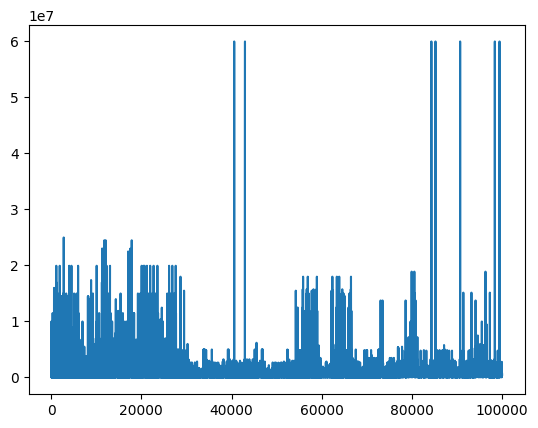

In [134]:
df.price.plot()

<Axes: >

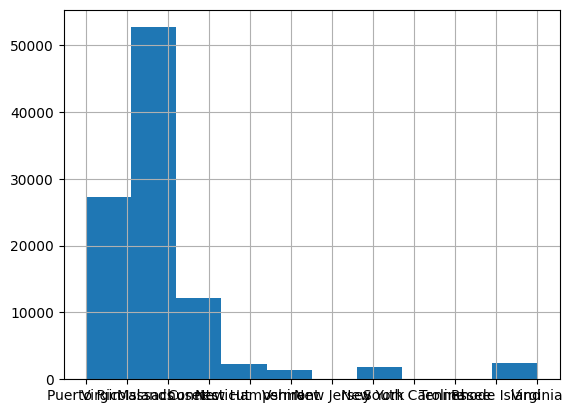

In [135]:
df.state.hist()

<Axes: >

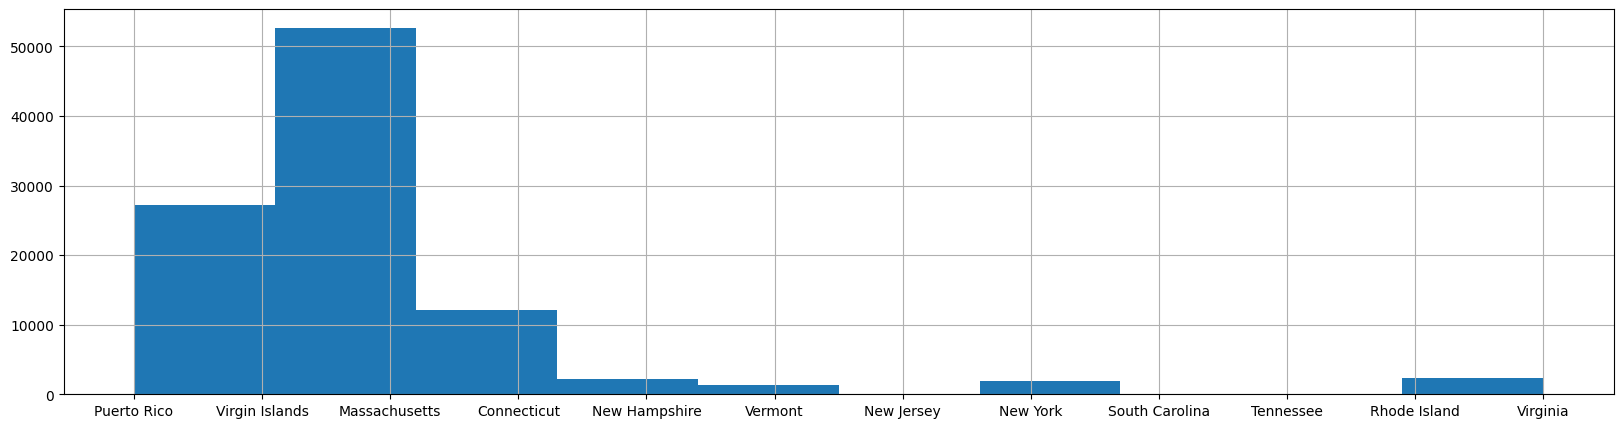

In [136]:
# Pandas uses Matplotlib to plot data. Hence you can use matplotlib to modify the plots from Pandas.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
df.state.hist()

You may also explore other types of plots Pandas can generate.
### Obtain and Manipulate Null Values

In [137]:
# Show what values are null in the dataframe
df.isna()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,True,False,False,False,False,True,False
99996,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False


Null values are masked as True, non-null values are masked as False.

In [138]:
# Get the count of null values in each column
df.isna().sum()

status                0
bed               24950
bath              24888
acre_lot          14013
city                 52
state                 0
zip_code            195
house_size        24918
prev_sold_date    71255
price                 0
dtype: int64

By default, the sum() method is applied over columns (axis=0) and thus gets the sum of values of each column, to get the sum of values of each row instead, pass 'axis=1' to the sum() method.

In [139]:
df.isna().sum(axis=1)

0        1
1        1
2        1
3        1
4        2
        ..
99995    2
99996    0
99997    0
99998    0
99999    0
Length: 100000, dtype: int64

<center><b><font size='6'>--X-- END --X--</font></b></center>